In [1]:
import pandas as pd

In [2]:
import wikipedia


In [3]:
articles=['Data Science','Artificial intelligence',"deep learning",
          'Swimming',"Badminton","cricket","statistics","Cyber security","volley ball","computer programming"]
wiki_lst=[]
title=[]
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)
print("examine content")
wiki_lst
     

loading content:  Data Science
loading content:  Artificial intelligence
loading content:  deep learning
loading content:  Swimming
loading content:  Badminton
loading content:  cricket
loading content:  statistics
loading content:  Cyber security
loading content:  volley ball
loading content:  computer programming
examine content


['Data science is an interdisciplinary academic field  that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from noisy, structured, and unstructured data.Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science a

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(wiki_lst)

In [5]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

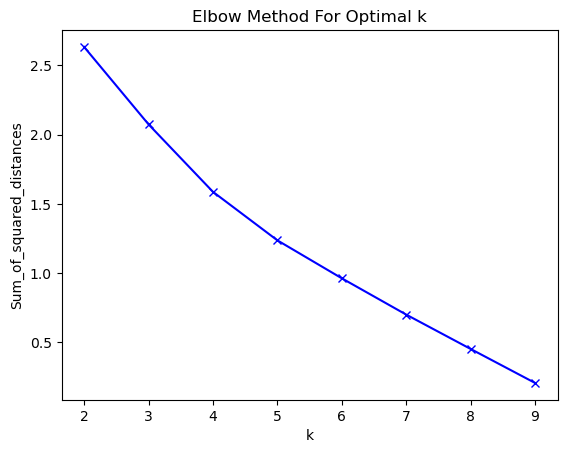

In [6]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [7]:

true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                     title  cluster
0             Data Science        0
4                Badminton        1
5                  cricket        1
8              volley ball        1
1  Artificial intelligence        2
2            deep learning        2
6               statistics        2
7           Cyber security        2
9     computer programming        2
3                 Swimming        3


Cluster: 0
Titles
Data Science


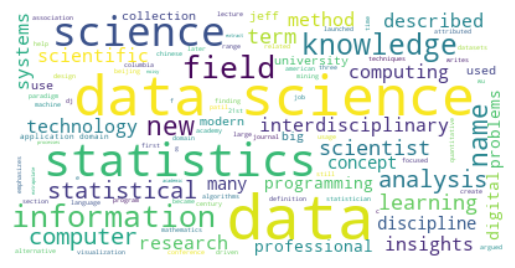

Cluster: 1
Titles
  Badminton
    cricket
volley ball


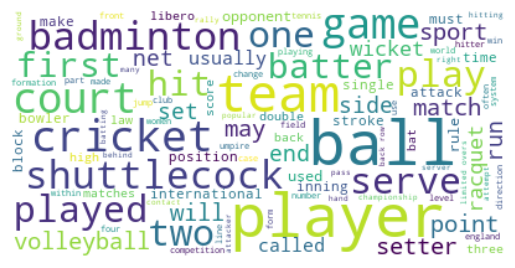

Cluster: 2
Titles
Artificial intelligence
          deep learning
             statistics
         Cyber security
   computer programming


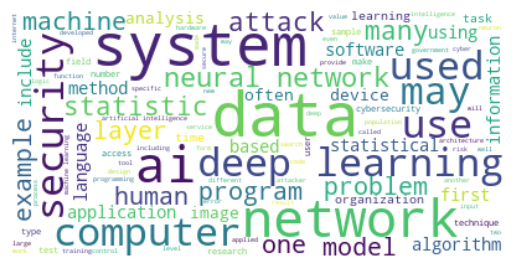

Cluster: 3
Titles
Swimming


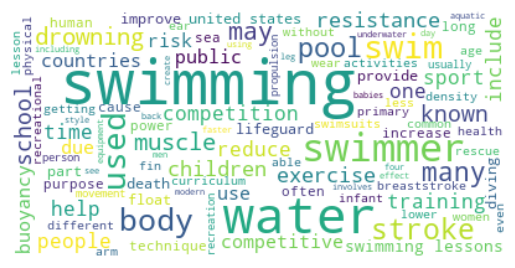

In [8]:

from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()